In [1]:
# This example will show how to compute LAC (mu value) using crip.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from crip.physics import Spectrum, Atten, computeAttenedSpectrum, normalizeSpectrum, DiagEnergyRange, computeMu, EnergyConversion
from crip.plot import plotSpectrum

Text(0.5, 1.0, 'Spectrum')

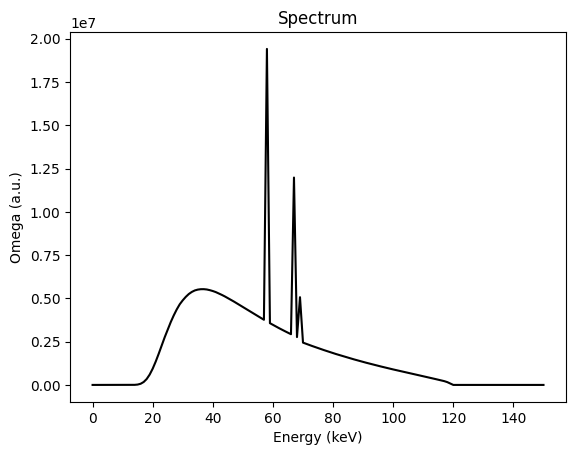

In [3]:
# Parse a spectrum from text file.
spec = Spectrum.fromFile('02-Spectrum.txt', 'keV')
# Plot it.
_, ax = plt.subplots(1, 1)
plotSpectrum(ax, spec); ax.set_title('Spectrum')

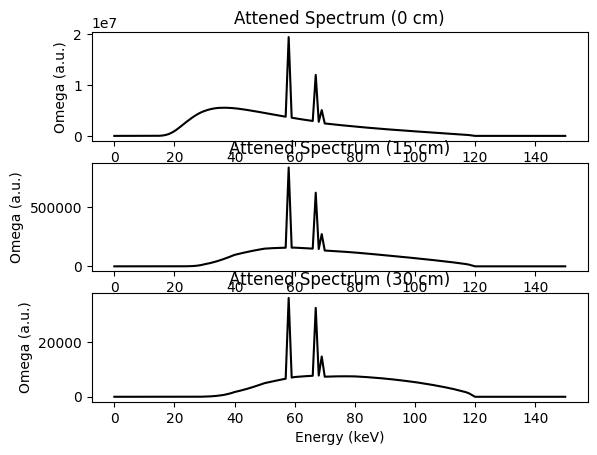

In [4]:
# Compute the spectrum after pre-attenuation.
Water = Atten.fromBuiltIn('Water')
spec15cm = computeAttenedSpectrum(spec, [Water], [15 * 10]) # Water, 150 mm
spec30cm = computeAttenedSpectrum(spec, [Water], [30 * 10])
# Plot it
_, (ax1, ax2, ax3) = plt.subplots(3, 1)
plotSpectrum(ax1, spec); ax1.set_title('Attened Spectrum (0 cm)')
plotSpectrum(ax2, spec15cm); ax2.set_title('Attened Spectrum (15 cm)')
plotSpectrum(ax3, spec30cm); ax3.set_title('Attened Spectrum (30 cm)')
plt.show()

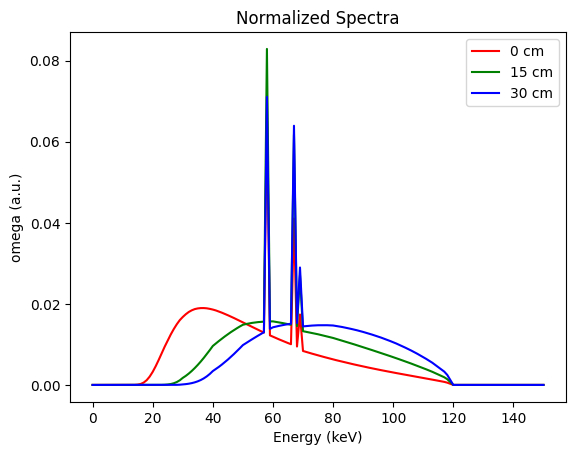

In [5]:
# Plot their normalized spectrum.
plt.figure()
plt.plot(DiagEnergyRange, normalizeSpectrum(spec).omega, label='0 cm', c='r')
plt.plot(DiagEnergyRange, normalizeSpectrum(spec15cm).omega, label='15 cm', c='g')
plt.plot(DiagEnergyRange, normalizeSpectrum(spec30cm).omega, label='30 cm', c='b')
plt.title('Normalized Spectra'); plt.xlabel('Energy (keV)'); plt.ylabel('omega (a.u.)'); plt.legend()

In [6]:
# Compute the LAC of water with `spec` received by a Photon-Counting Detector.
muWater = computeMu(Water, spec, EnergyConversion.PCD)
print('muWater = {:.4f} mm^-1'.format(muWater))

muWater = 0.0265 mm^-1
